# Start Here

#### We still have our clean dataset saved as "data.csv".

# In-Depth Analysis

#### Importing relevant packages and also load the csv file.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
sns.set()

from scipy import stats

data = pd.read_csv('data.csv')

In [3]:
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Get Dummies and Train-Test-Split

In [4]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [5]:
data = data[data.price<data.price.quantile(.95)]

In [6]:
price = data.price

In [7]:
df=data.drop(['price', 'latitude', 'longitude', 'neighbourhood'], axis=1)

In [8]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
df.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,1,9,0.21,6,365,1,0,0,0,1,0
1,1,45,0.38,2,355,0,1,0,0,0,0
2,3,0,0.00,1,365,0,1,0,0,1,0
3,1,270,4.64,1,194,1,0,0,0,0,0
4,10,9,0.10,1,0,0,1,0,0,0,0


In [9]:
x_train, x_test, y_train, y_test = train_test_split(df, price, test_size = 0.25, random_state=18)

### Create The Regression Using Train Data

In [10]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_hat = reg.predict(x_train)

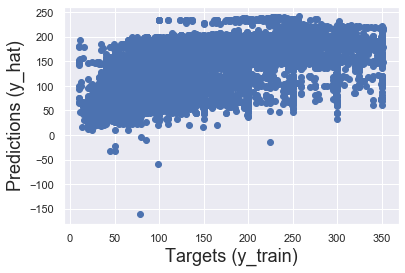

In [12]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

### Root Mean Squared Error (RMSE) - Train Data

In [13]:
#RMSE by setting squared to False
lr_train_rmse = mean_squared_error(y_train, y_hat, squared=False)
print(lr_train_rmse)

53.242754590023054


### R-Squared and Adjusted R-Squared - Train Data

In [14]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [15]:
#R-Squared
lr_train_r2 = reg.score(x_train, y_train)
print(lr_train_r2)

0.45000725090707033


In [16]:
#Adjusted R-Squared
adj_r2(x_train, y_train)

0.4498334625513303

### Mean Absolute Percent Error (MAPE) - Train Data

In [17]:
#MAPE
lr_train_mape = np.absolute((y_train - y_hat)/y_train*100).mean()
print(lr_train_mape)

37.82610232280858


### Test data

In [18]:
y_hat_test = reg.predict(x_test)

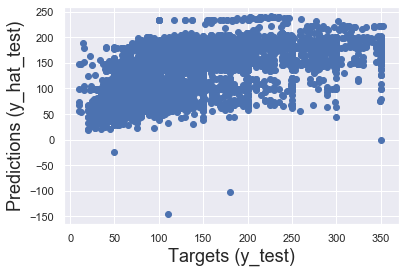

In [19]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

### Root Mean Squared Error (RMSE) - Test Data

In [20]:
#RMSE by setting squared to False
lr_test_rmse = mean_squared_error(y_test, y_hat_test, squared=False)
print(lr_test_rmse)

53.49061544674805


### R-Squared and Adjusted R-Squared - Test Data

In [21]:
#R-Squared
lr_test_r2 = reg.score(x_test, y_test)
print(lr_test_r2)

0.4512471134917443


In [22]:
#Adjusted R-Squared
adj_r2(x_test, y_test)

0.45072660976219436

### Mean Absolute Percent Error (MAPE) - Test Data

In [23]:
#MAPE
y_test_hat = reg.predict(x_test)
lr_test_mape = np.absolute((y_test - y_test_hat)/y_test*100).mean()
print(lr_test_mape)

37.961281159447786


### Ridge Regression - Train Data

In [24]:
#Finding optimal Alpha with the best RMSE
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 1.5, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_root_mean_squared_error', cv=10)
ridge_regressor.fit(x_train, y_train)

print(ridge_regressor.best_params_)

{'alpha': 1}


In [25]:
#RMSE
ridge_train_rmse = abs(ridge_regressor.score(x_train, y_train))
print(ridge_train_rmse)

53.24276103362469


In [26]:
#R-Squared
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_train)
ridge_train_r2 = ridge.score(x_train, y_train)
print(ridge_train_r2)

0.4500071177834401


In [27]:
#MAPE
ridge_train_mape = np.absolute((y_train - ridge_pred)/y_train*100).mean()
print(ridge_train_mape)

37.82965789496466


### Ridge Regression - Test Data

In [28]:
#RMSE
ridge_test_rmse = abs(ridge_regressor.score(x_test, y_test))
print(ridge_test_rmse)

53.49061017912772


In [29]:
#R-Squared
ridge_test_r2 = ridge.score(x_test, y_test)
print(ridge_test_r2)

0.4512472215713279


In [30]:
#MAPE
ridge_pred_test = ridge.predict(x_test)
ridge_test_mape = np.absolute((y_test - ridge_pred_test)/y_test*100).mean()
print(ridge_test_mape)

37.964140922217446


### Lasso Regression - Train Data

In [31]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 1.5, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_root_mean_squared_error', cv = 5)
lasso_regressor.fit(x_train, y_train)


C:\Users\KinCodingLaptop\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38147756.8952419, tolerance: 14335.933286593203
  positive)
C:\Users\KinCodingLaptop\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36918051.57772668, tolerance: 14301.26116307836
  positive)
C:\Users\KinCodingLaptop\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38567362.46005659, tolerance: 14416.021144621129
  positive)
C:\Users\KinCodingLaptop\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to inc

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   1.5, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [32]:
print(lasso_regressor.best_params_)

{'alpha': 0.01}


In [33]:
#RMSE
lasso_train_rmse = abs(lasso_regressor.score(x_train, y_train))
print(lasso_train_rmse)

53.2430938229256


In [34]:
#R-Squared
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_train)
lasso_train_r2 = lasso.score(x_train, y_train)
print(lasso_train_r2)

0.4500002423954911


In [35]:
#MAPE
lasso_train_mape = np.absolute((y_train - lasso_pred)/y_train*100).mean()
print(lasso_train_mape)

37.837853486766505


### Lasso Regression - Test Data

In [36]:
#RMSE
lasso_test_rmse= abs(lasso_regressor.score(x_test, y_test))
print(lasso_test_rmse)

53.48936744274584


In [37]:
#R-Squared
lasso_test_r2 = lasso.score(x_test, y_test)
print(lasso_test_r2)

0.45127271939676916


In [38]:
#MAPE
lasso_pred_test = lasso.predict(x_test)

#MAPE
lasso_test_mape = np.absolute((y_test - lasso_pred_test)/y_test*100).mean()
print(lasso_test_mape)

37.96785880449098


### Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 3)

In [42]:
from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}


In [43]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [51]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 47.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [52]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [51]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
base_model = RandomForestRegressor(n_estimators = 1600, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

In [56]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_train, y_train)

Model Performance
Average Error: 34.6551 degrees.
Accuracy = 66.89%.


In [57]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

Model Performance
Average Error: 36.7021 degrees.
Accuracy = 64.48%.


In [62]:
pprint(best_random)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [44]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [100, 200, 1600]
}

# Create a based model
rf2 = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf2, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [45]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 10.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [46]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 1600}

In [47]:
best_grid = grid_search.best_estimator_

In [48]:
print('Parameters currently in use:\n')
pprint(best_grid.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1600,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [52]:
grid_accuracy = evaluate(best_grid, x_test, y_test)

Model Performance
Average Error: 36.7045 degrees.
Accuracy = 64.48%.


In [53]:
#RMSE
rf_pred = best_grid.predict(x_train)
rf_train_rmse = mean_squared_error(y_train, rf_pred, squared=False)
print(rf_train_rmse)

48.253070759812495


In [54]:
#R-Squared
rf_train_r2 = best_grid.score(x_train, y_train)
print(rf_train_r2)

0.5482628116693418


In [56]:
#MAPE
rf_train_mape = np.absolute((y_train - rf_pred)/y_train*100).mean()
print(rf_train_mape)

33.15873938553127


In [57]:
#RMSE - For test data
rf_test_pred = best_grid.predict(x_test)
rf_test_rmse = mean_squared_error(y_test, rf_test_pred, squared=False)
print(rf_test_rmse)

50.980943376482614


In [58]:
#R-Squared - For test data
rf_test_r2 = best_grid.score(x_test, y_test)
print(rf_test_r2)

0.5015319080941653


In [59]:
#MAPE - For Test Data
rf_test_mape = np.absolute((y_test - rf_test_pred)/y_test*100).mean()
print(rf_test_mape)

35.51996657882938


### Putting It All Together

In [60]:
summary = {'RMSE':[lr_train_rmse, lr_test_rmse, ridge_train_rmse, ridge_test_rmse, lasso_train_rmse, lasso_test_rmse, rf_train_rmse, rf_test_rmse], 'R2':[lr_train_r2, lr_test_r2, ridge_train_r2, ridge_test_r2, lasso_train_r2, lasso_test_r2, rf_train_r2, rf_test_r2], 'MAPE':[lr_train_mape, lr_test_mape, ridge_train_mape, ridge_test_mape, lasso_train_mape, lasso_test_mape, rf_train_mape, rf_test_mape]}
df_summary = pd.DataFrame(summary, index=['LR_Train', 'LR_Test', 'Ridge_Train', 'Ridge_Test', 'Lasso_Train', 'Lasso_Test', 'RF_Train', 'RF_Test'])

In [61]:
df_summary

,RMSE,R2,MAPE
LR_Train,53.242755,0.450007,37.826102
LR_Test,53.490615,0.451247,37.961281
Ridge_Train,53.242761,0.450007,37.829658
Ridge_Test,53.490610,0.451247,37.964141
Lasso_Train,53.243094,0.450000,37.837853
Lasso_Test,53.489367,0.451273,37.967859
RF_Train,48.253071,0.548263,33.158739
RF_Test,50.980943,0.501532,35.519967


Looking at the RMSE, R-Squared and MAPE of all models, Random Forest Regressor stands out the most. 

We will look deeperi nto Linear Regression model and the RFR model, below plots show scatterplot of actual values vs predicted values.

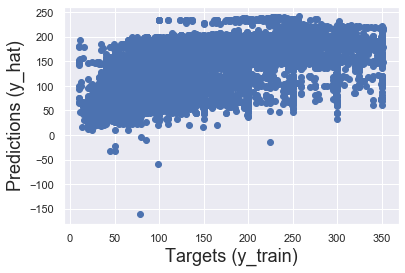

In [62]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

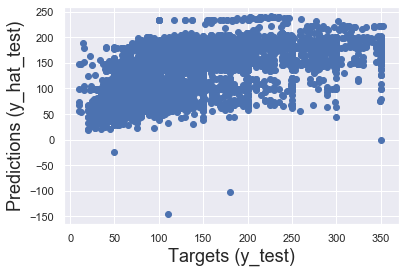

In [63]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

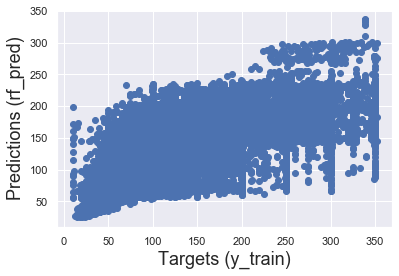

In [68]:
plt.scatter(y_train, rf_pred)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (rf_pred)',size=18)
plt.show()

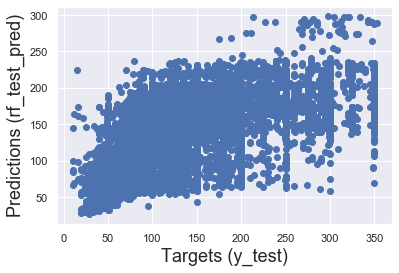

In [67]:
plt.scatter(y_test, rf_test_pred)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (rf_test_pred)',size=18)
plt.show()

Below are scatterplots of predicted values vs residuals

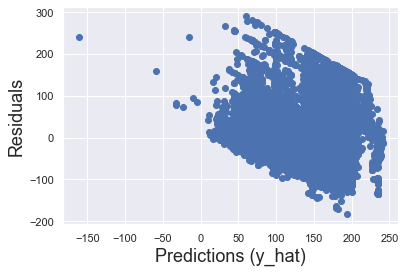

In [561]:
plt.scatter(y_hat, df_train['Residual'])
plt.xlabel('Predictions (y_hat)',size=18)
plt.ylabel('Residuals',size=18)
plt.show()

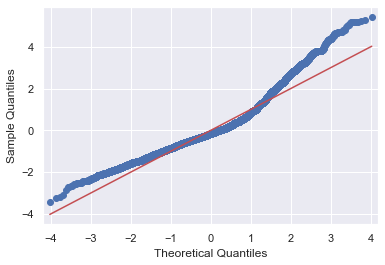

In [565]:
_ = sm.qqplot(df_train['Residual'], fit=True, line='s')

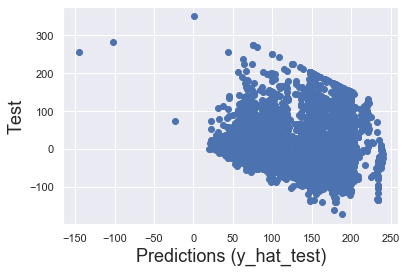

In [562]:
plt.scatter(y_hat_test, df_test['Residual'])
plt.xlabel('Predictions (y_hat_test)',size=18)
plt.ylabel('Test',size=18)
plt.show()

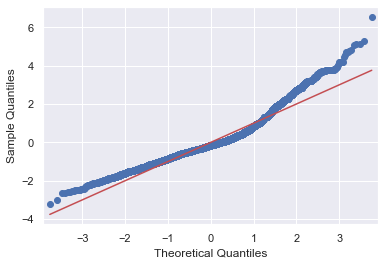

In [566]:
_ = sm.qqplot(df_test['Residual'], fit=True, line='s')

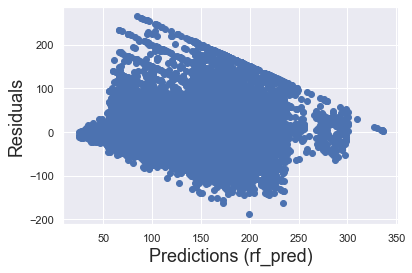

In [69]:
plt.scatter(rf_pred, (y_train - rf_pred))
plt.xlabel('Predictions (rf_pred)',size=18)
plt.ylabel('Residuals',size=18)
plt.show()

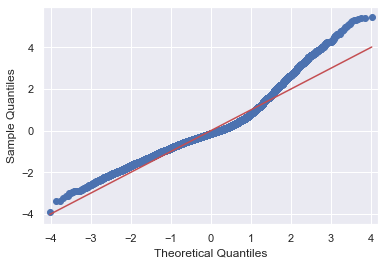

In [70]:
_ = sm.qqplot((y_train - rf_pred), fit=True, line='s')

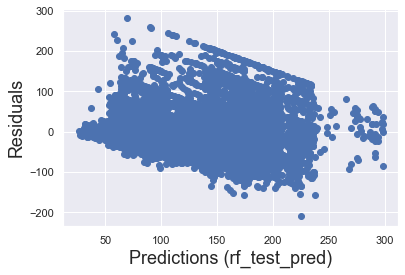

In [71]:
plt.scatter(rf_test_pred, (y_test - rf_test_pred))
plt.xlabel('Predictions (rf_test_pred)',size=18)
plt.ylabel('Residuals',size=18)
plt.show()

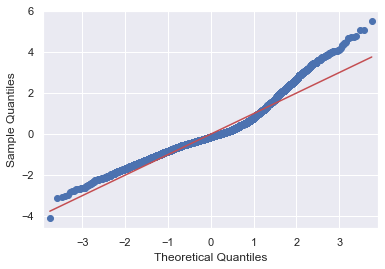

In [72]:
_ = sm.qqplot((y_test - rf_test_pred), fit=True, line='s')

The residual plots and qq plot looks decent.

Below are histograms of the residuals

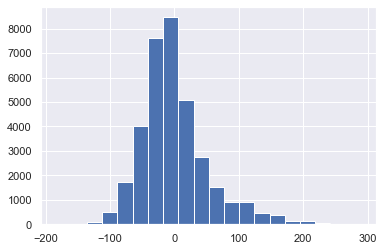

In [568]:
_ = plt.hist(df_train['Residual'], bins = 20)

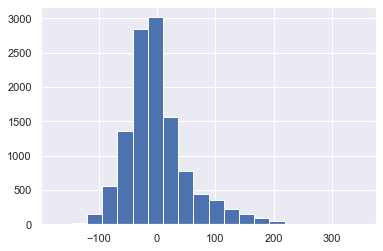

In [569]:
_ = plt.hist(df_test['Residual'], bins = 20)

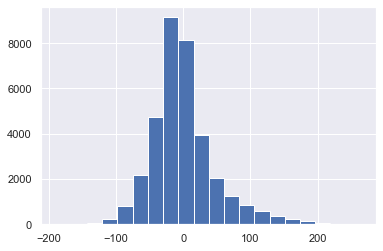

In [75]:
_ = plt.hist(y_train - rf_pred, bins = 20)

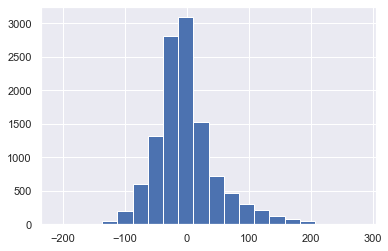

In [73]:
_ = plt.hist(y_test - rf_test_pred, bins = 20)

The histograms looks normal, maybe a slightly right skewed.

## Model Summary

In [586]:
round(reg.intercept_,3)

126.14

In [582]:
reg_summary = pd.DataFrame(df.columns.values, columns=['Features'])
reg_summary['Coefficients'] = reg.coef_
reg_summary['F-statistics'] = f_regression(x_train,y_train)[0].round(3)
reg_summary['P-values'] = f_regression(x_train,y_train)[1].round(3)
reg_summary

,Features,Coefficients,F-statistics,P-values
0,minimum_nights,-0.242368,32.901,0.0
1,number_of_reviews,-0.047594,37.329,0.0
2,reviews_per_month,-0.825077,93.175,0.0
3,calculated_host_listings_count,0.127663,1036.314,0.0
4,availability_365,0.055885,133.450,0.0
5,neighbourhood_group_Brooklyn,22.851811,1158.846,0.0
6,neighbourhood_group_Manhattan,54.261456,4140.439,0.0
7,neighbourhood_group_Queens,11.299690,1000.244,0.0
8,neighbourhood_group_Staten Island,-1.378366,63.120,0.0
9,room_type_Private room,-80.827102,16462.094,0.0


In [585]:
print(lr_train_r2)

0.45000725090707033


In [584]:
adj_r2(x_train, y_train)

0.4498334625513303

In [4]:
print('Dummy varibles were created for neighbourhood_group and room_type. When all features are 0, it is assumed to be located at Bronx for an entire home.')

print('\nThis linear regression model has an intercept of 126.14. So holding all other features to 0, the price of an entire home at Bronx is $126.14.')

print('\nRefer back to the reg_summary chart above, the coefficients of each feature are listed. For example. The coefficient of minimum_nights is -0.242368. For every 1 unit of increment of it will decrease the price by $ 0.24. Looking back at the dummary variables created. The default room type is entire home. Holding all else constant, if the listing is a private room or shared room, the price is expected to decrease by $80.83 or ~$104.34, respectively. Likewise, the default for neighbourhood_group is Bronx, but if the location is in Manhattan, the price is expected to increase up by ~$54.26.')


Dummy varibles were created for neighbourhood_group and room_type. When all features are 0, it is assumed to be located at Bronx for an entire home.

This linear regression model has an intercept of 126.14. So holding all other features to 0, the price of an entire home at Bronx is $126.14.

Refer back to the reg_summary chart above, the coefficients of each feature are listed. For example. The coefficient of minimum_nights is -0.242368. For every 1 unit of increment of it will decrease the price by $ 0.24. Looking back at the dummary variables created. The default room type is entire home. Holding all else constant, if the listing is a private room or shared room, the price is expected to decrease by $80.83 or ~$104.34, respectively. Likewise, the default for neighbourhood_group is Bronx, but if the location is in Manhattan, the price is expected to increase up by ~$54.26.


Looking at the p-values of all feature, they are all very low, which means they are statistically significant.

The R-Squared and Adjusted R-Squared of the model are approximately 0.45, which isn't bad, but there are room for improvement.